In [2]:
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
import zipfile

zip_data = zipfile.ZipFile('/content/archive.zip')
zip_data.extractall('/content/')
zip_data.close()

# **Import Essential Libraries**

In [5]:
import zipfile
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

In [6]:
img = cv2.imread('/content/test/Bike/Bike (1000).jpeg')
img

array([[[216, 218, 218],
        [193, 195, 195],
        [191, 193, 193],
        ...,
        [192, 187, 188],
        [192, 187, 188],
        [192, 187, 188]],

       [[217, 219, 219],
        [194, 196, 196],
        [192, 194, 194],
        ...,
        [192, 187, 188],
        [192, 187, 188],
        [192, 187, 188]],

       [[217, 219, 219],
        [194, 196, 196],
        [193, 195, 195],
        ...,
        [192, 187, 188],
        [192, 187, 188],
        [192, 187, 188]],

       ...,

       [[229, 231, 232],
        [229, 231, 232],
        [229, 231, 232],
        ...,
        [221, 220, 222],
        [221, 220, 222],
        [221, 220, 222]],

       [[206, 208, 209],
        [205, 207, 208],
        [205, 207, 208],
        ...,
        [221, 220, 222],
        [221, 220, 222],
        [221, 220, 222]],

       [[227, 229, 230],
        [227, 229, 230],
        [227, 229, 230],
        ...,
        [221, 220, 222],
        [221, 220, 222],
        [221, 220, 222]]

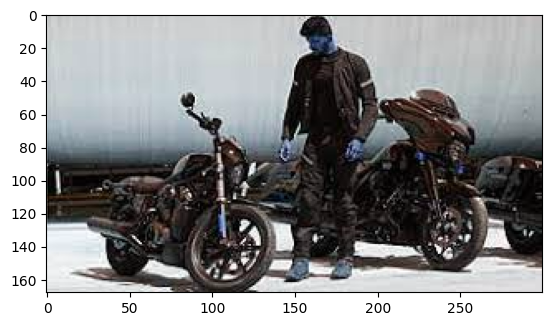

In [7]:
plt.imshow(img)

In [8]:
img.shape

(168, 300, 3)

In [9]:
# Generators

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    directory='/content/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_ds = test_datagen.flow_from_directory(
    directory='/content/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [10]:
print(f'Number of Batches: {2000//32}')

Number of Batches: 62


In [11]:
# 0 - 255

0/255, 255/255

(0.0, 1.0)

In [12]:
# Normalization

def scale_down_px(image, label):

  image = tf.cast(image/255, tf.float32)

  return image, label

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
  3/125 [..............................] - ETA: 11s - loss: 15.3724 - accuracy: 0.4792

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


125/125 [==============================] - 84s 596ms/step - loss: 2.7631 - accuracy: 0.7293 - val_loss: 11.3811 - val_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 77s 617ms/step - loss: 0.9763 - accuracy: 0.8148 - val_loss: 3.7729 - val_accuracy: 0.5720
Epoch 3/10
125/125 [==============================] - 76s 608ms/step - loss: 0.5502 - accuracy: 0.8568 - val_loss: 1.9051 - val_accuracy: 0.6348
Epoch 4/10
125/125 [==============================] - 78s 620ms/step - loss: 0.4016 - accuracy: 0.8827 - val_loss: 0.5685 - val_accuracy: 0.8215
Epoch 5/10
125/125 [==============================] - 76s 606ms/step - loss: 0.3416 - accuracy: 0.8950 - val_loss: 0.1914 - val_accuracy: 0.9333
Epoch 6/10
125/125 [==============================] - 76s 602ms/step - loss: 0.2596 - accuracy: 0.9135 - val_loss: 0.2279 - val_accuracy: 0.9222
Epoch 7/10
125/125 [==============================] - 85s 682ms/step - loss: 0.2079 - accuracy: 0.9250 - val_loss: 0.2153 - val_accuracy: 0.

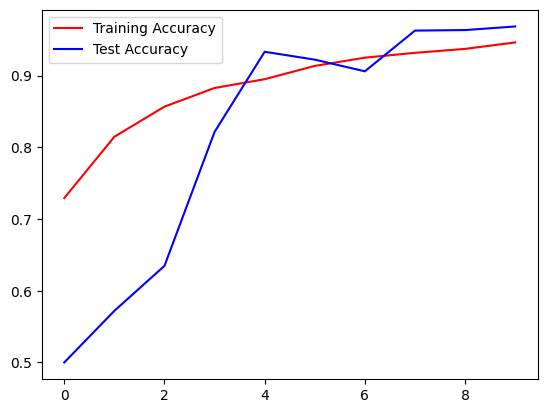

In [17]:
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Test Accuracy')
plt.legend()
plt.show()

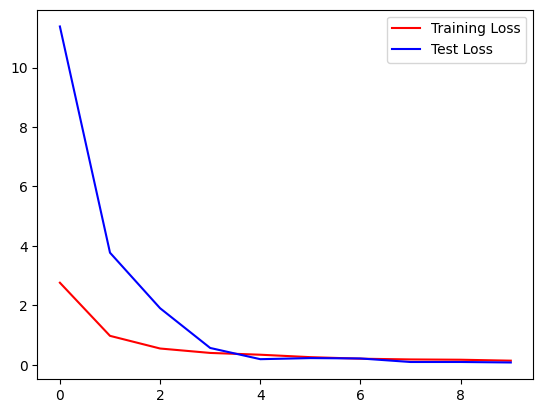

In [18]:
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Test Loss')
plt.legend()
plt.show()

In [19]:
test_img = cv2.imread('/content/test/Bike/Bike (1000).jpeg')
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape(1, 256, 256, 3) / 255.0

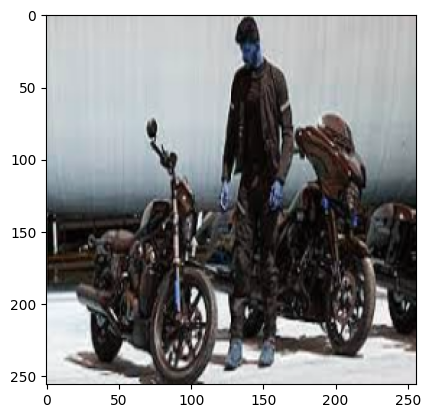

In [20]:
plt.imshow(test_img)
plt.show()

In [21]:
output = model.predict(test_input)[0][0]
print(f'Output is: {output} \n')

if output < 0.5:
    print('This is a Bike')
else:
    print('This is a Car')


1/1 [==============================] - 0s 385ms/step
Output is: 0.0002489235776010901 

This is a Bike
